# D8 Recreating  W E B Du Bois Visualisation
---
### Thirty days of Data Visualisations
JWriggy

Inspired by a [challenge](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge) to recreate some of Du Bois's classic visualisations.

Since no shape data was provided with the challenge I used country borders to give a rough approximation to the shaded areas in WE Du Bois' vis. Maps were created with cartopy using data from Natural Earth.

In [1]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
# for maps
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import geopandas

import numpy as np

plt.style.use('db.mplstyle')

In [2]:
# map data
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
df = geopandas.read_file(shpfilename)

states_shp = shpreader.natural_earth(resolution='110m',
                                category='cultural', 
                                name='admin_1_states_provinces_lakes_shp')
statesdf = geopandas.read_file(states_shp)

In [3]:
afr_countries = df.loc[((df['CONTINENT'] == 'Africa') & (df['ADMIN'] != 'Madagascar'))]['ADMIN']
afr_countries[:5]

1          United Republic of Tanzania
2                       Western Sahara
11    Democratic Republic of the Congo
12                             Somalia
13                               Kenya
Name: ADMIN, dtype: object

In [4]:
# text
title = 'THE GEORGIA NEGRO.'
subtitle = 'A SOCIAL STUDY\nBY\nW.E.BERGHARDT DU BOIS.'

# style
ec = '#666666'
col = '#555555'
h2 = {'fontsize': 10, 'alpha': 0.6,  'ha':'center', 'va':'center'}

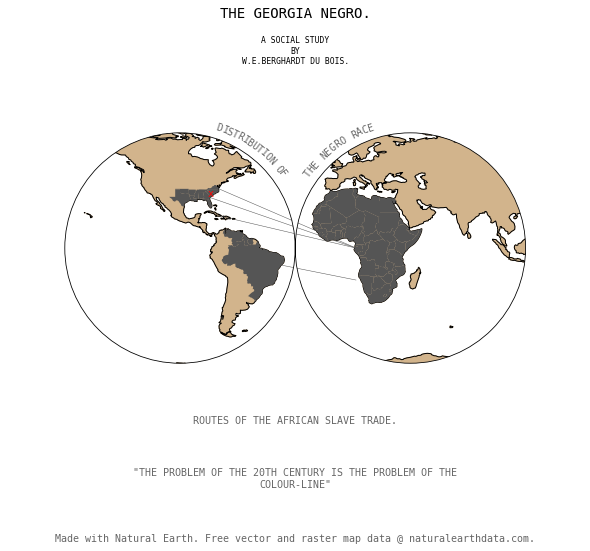

In [5]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

ax_crs = ccrs.PlateCarree(central_longitude=-28.0)
data_crs = ccrs.PlateCarree(central_longitude=0.0)

fig = plt.figure(figsize=(9,8))
geoax = plt.subplot(111, projection=ax_crs)
geoax.set_global()

geoax.coastlines()
geoax.add_feature(cfeature.LAND, facecolor='#d2b48c')

# colour countries black
# NB this is a rough approximation of Du Bois vis - not an accurate list of countries!
for country in afr_countries:
    # read the borders of the country in this loop
    poly = df.loc[df['ADMIN'] == country]['geometry']
    geoax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=col, edgecolor='none', zorder=1)

for country in ['Brazil','Venezuela','Guyana','Suriname']:
    poly = df.loc[df['ADMIN'] == country]['geometry']
    geoax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=col, edgecolor='none', zorder=1)
# French Giuana is under ADMIN = France in natural earth data. Missed off this plot
for state in ['Georgia','Alabama','Florida','North Carolina', 'South Carolina','Mississippi',
              'Tennessee','Texas','Louisiana','Arkansas','Oklahoma','Virginia']:
    poly = statesdf.loc[statesdf['name'] == state]['geometry']
    geoax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=col, edgecolor='none', zorder=1)

geoax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=col, edgecolor='none', zorder=1)

# Annotate Georgia
geoax.text(-82.9,32.166,'x',color='r',transform=data_crs)

# Clip to circles
x0, x1, y0, y1 = geoax.get_extent()
r = x1*.4
centrey = (y0+y1)/2
circle1_path = mpath.Path.circle(center = (-r, centrey), radius=r)
circle2_path = mpath.Path.circle(center = (r, centrey), radius=r)
circles = mpath.Path.make_compound_path(circle1_path, circle2_path)
geoax.set_boundary(circles)

#lines
geoax.plot([-82.9, 10], [32.166, 0], transform=ccrs.PlateCarree(),color=col, lw=.5)
geoax.plot([-78, 10], [38, 0], transform=ccrs.PlateCarree(),color=col, lw=.5)
geoax.plot([-75, 10], [20, 0], transform=ccrs.PlateCarree(),color=col, lw=.5)
geoax.plot([-40, 10], [-10, -20], transform=ccrs.PlateCarree(),color=col, lw=.5)

# curved text
rtxt = 1.1*r
txt1 = 'DISTRIBUTION OF'
thetatxt = np.linspace(.4*np.pi,.2*np.pi,len(txt1))
xs,ys = rtxt*np.cos(thetatxt) -r, rtxt*np.sin(thetatxt) +centrey
for i,char in enumerate(txt1):
    geoax.text(xs[i],ys[i],char, fontdict=h2,rotation=270+(thetatxt[i]*180)/np.pi)
txt2 = 'THE NEGRO RACE'
thetatxt = np.linspace(.8*np.pi,.6*np.pi,len(txt2))
xs, ys = rtxt*np.cos(thetatxt) +r, rtxt*np.sin(thetatxt) +centrey
for i,char in enumerate(txt2):
    geoax.text(xs[i],ys[i],char, fontdict=h2,rotation=270+(thetatxt[i]*180)/np.pi)

fig.subplots_adjust(bottom=0.3, top=0.8,left=0.05, right=0.95, wspace=0.02)
fig.text(0.5,0.95,title, fontsize=14, ha='center')
fig.text(0.5,0.87,subtitle, fontsize=8, ha='center')
fig.text(.5,0.25,'ROUTES OF THE AFRICAN SLAVE TRADE.',fontdict=h2)
fig.text(.5,0.15,'"THE PROBLEM OF THE 20TH CENTURY IS THE PROBLEM OF THE\nCOLOUR-LINE"',fontdict=h2)
fig.text(.5,.04,"Made with Natural Earth. Free vector and raster map data @ naturalearthdata.com.", alpha=0.6, ha='center') 
plt.savefig("vis/D8_duBois8.png")
plt.show()

plt.show()